In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 -. Lectura de datos

In [3]:
df4 = pd.read_csv(r'./rama_2023_05_missing_outliers_limited.csv')

In [4]:
df4.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


# 2 -. Gráfico de las variables

## Gráficos

In [5]:
df4['fecha'] = pd.to_datetime(df4['fecha'], format='%Y-%m-%d', errors='coerce')



In [6]:
# Verificar si hay fechas que no se pudieron convertir
invalid_dates = df4[df4['fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)
else:
    print(invalid_dates)



Empty DataFrame
Columns: [fecha, CO, NO, NO2, NOX, O3, PM10, PM25, SO2]
Index: []


In [7]:
df4.set_index('fecha', inplace= True)

In [8]:
#Verificar que la fecha haya sido puesta como indice
df4.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [9]:
# Función para graficar series de tiempo con rango de fechas y zonas específicas
def plot_time_series(df4, variable, ylabel, title, start_date=None, end_date=None):
    # Configurar el tamaño de la figura del gráfico
    plt.figure(figsize=(15, 5))
    
    # Si se proporcionan fechas de inicio y fin, filtrar el DataFrame para ese rango de fechas
    if start_date and end_date:
        df4 = df4.loc[start_date:end_date]
    
    
        column = f"{variable}"
        # Verificar si la columna existe en el DataFrame
        if column in variable:
            # Graficar la serie de tiempo de la columna
            plt.plot(df4.index, df4[column], label=column)
        else:
            # Imprimir un mensaje si la columna no se encuentra en el DataFrame
            print(f"Columna {column} no encontrada en el DataFrame")

    # Etiqueta del eje x
    plt.xlabel('Fecha_Hora')
    # Etiqueta del eje y
    plt.ylabel(ylabel)
    # Título del gráfico
    plt.title(title)
    # Mostrar la leyenda del gráfico
    plt.legend()
    # Mostrar el gráfico
    plt.show()

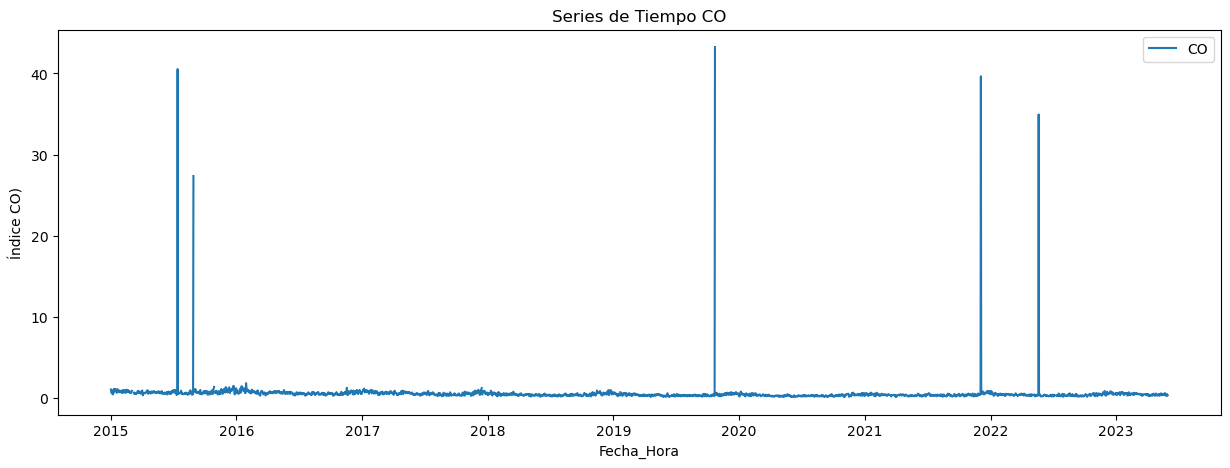

In [10]:
plot_time_series(df4,'CO', 'Índice CO)', 'Series de Tiempo CO', start_date='2015-01-01', end_date='2023-05-31')

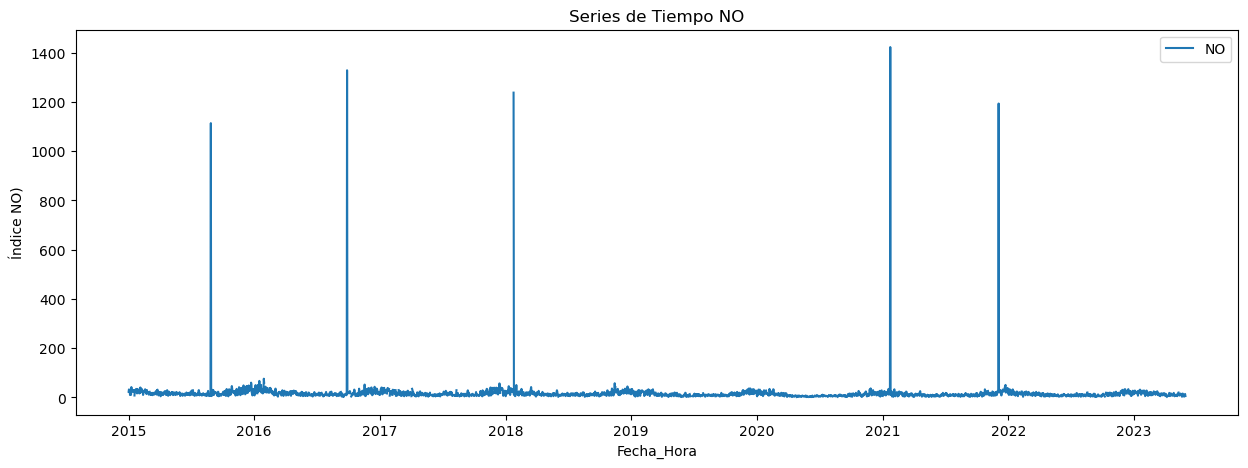

In [11]:
plot_time_series(df4,'NO', 'Índice NO)', 'Series de Tiempo NO', start_date='2015-01-01', end_date='2023-05-31')

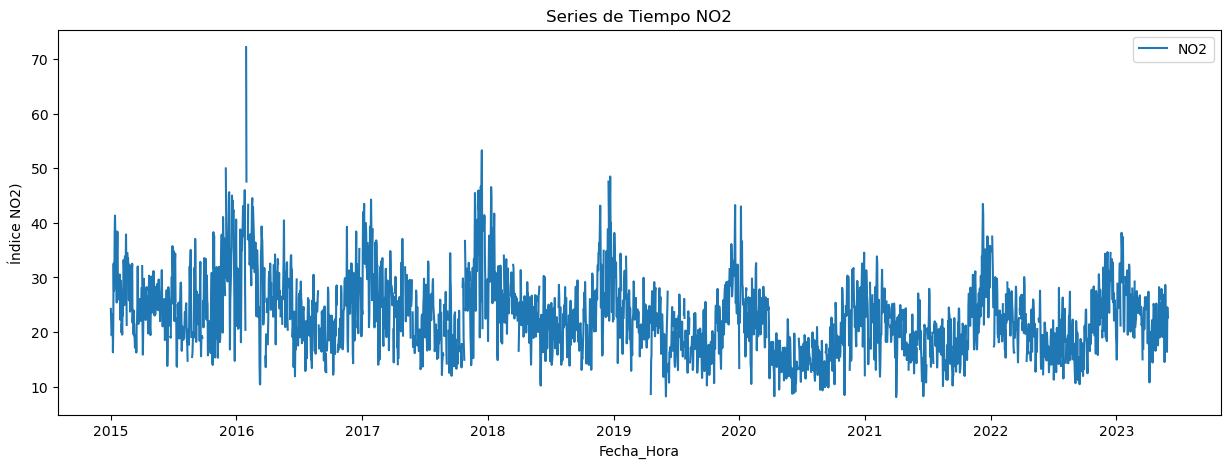

In [12]:
plot_time_series(df4,'NO2', 'Índice NO2)', 'Series de Tiempo NO2', start_date='2015-01-01', end_date='2023-05-31')

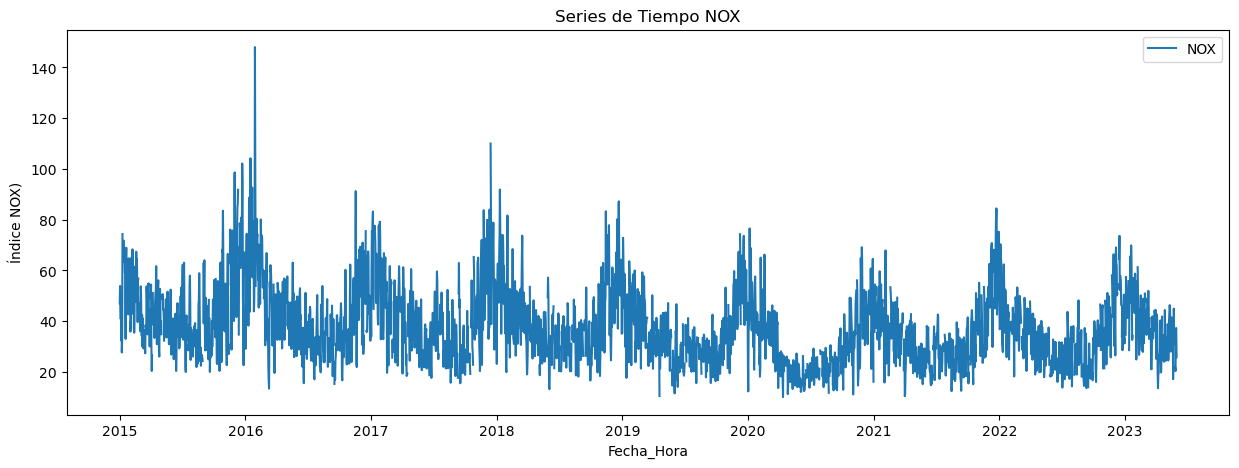

In [13]:
plot_time_series(df4,'NOX', 'Índice NOX)', 'Series de Tiempo NOX', start_date='2015-01-01', end_date='2023-05-31')

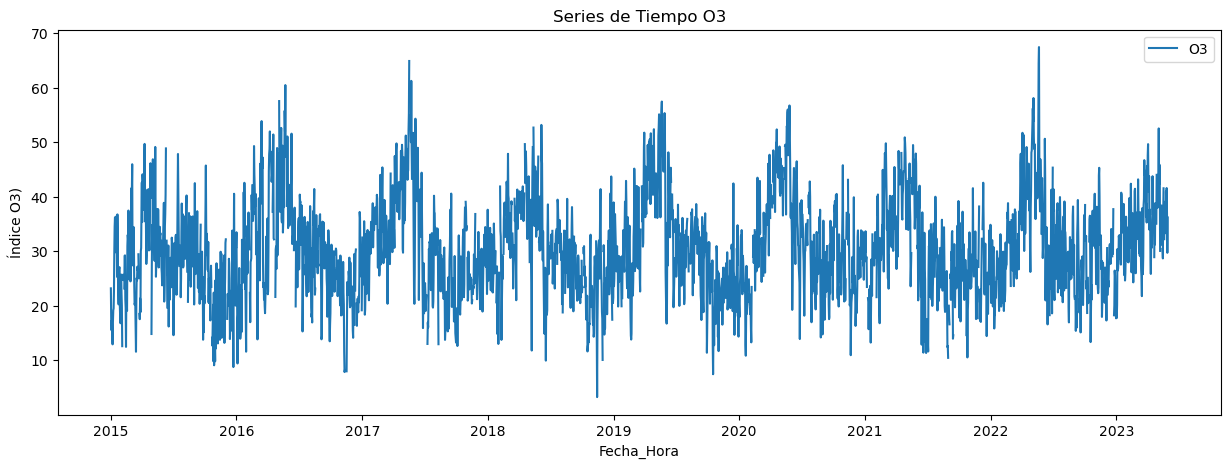

In [14]:
plot_time_series(df4,'O3', 'Índice O3)', 'Series de Tiempo O3', start_date='2015-01-01', end_date='2023-05-31')

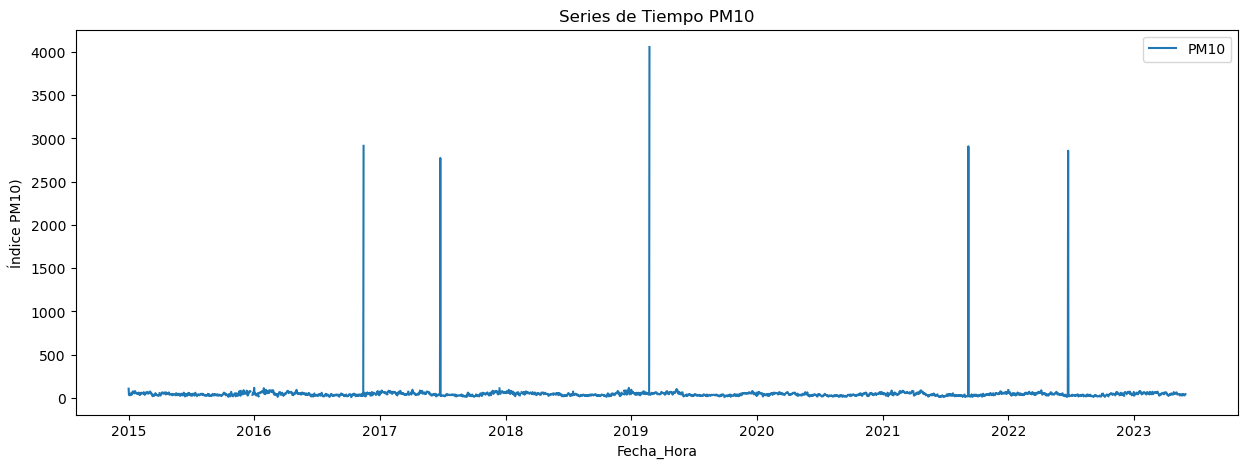

In [15]:
plot_time_series(df4,'PM10', 'Índice PM10)', 'Series de Tiempo PM10', start_date='2015-01-01', end_date='2023-05-31')

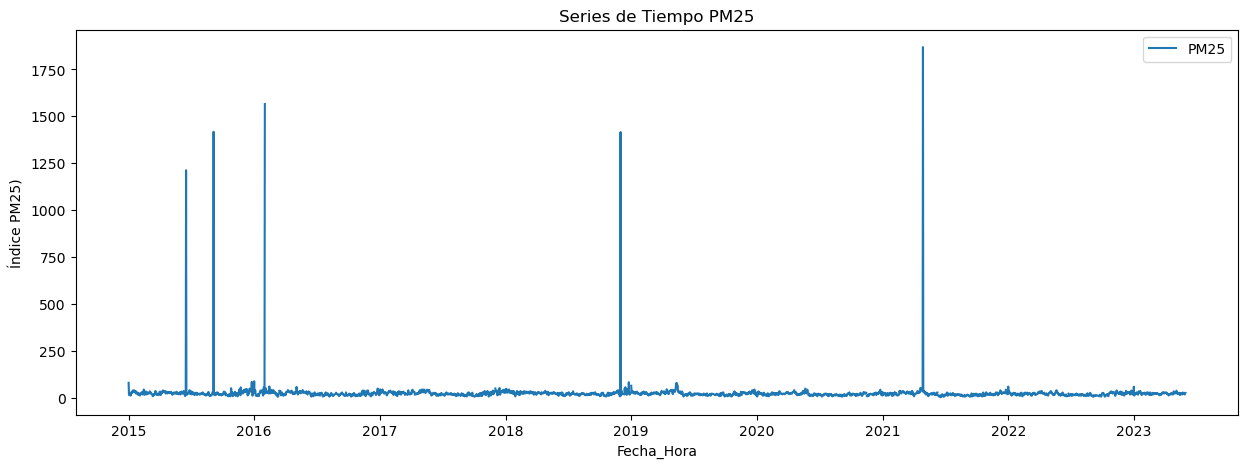

In [16]:
plot_time_series(df4,'PM25', 'Índice PM25)', 'Series de Tiempo PM25', start_date='2015-01-01', end_date='2023-05-31')

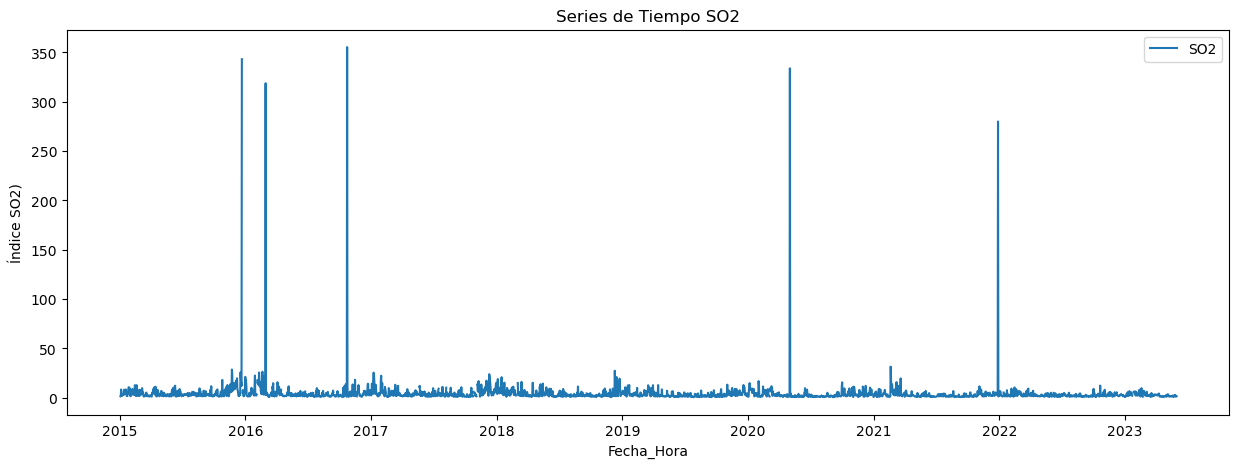

In [17]:
plot_time_series(df4,'SO2', 'Índice SO2)', 'Series de Tiempo SO2', start_date='2015-01-01', end_date='2023-05-31')

## b
# Visualiazción de valores atípicos

<Axes: >

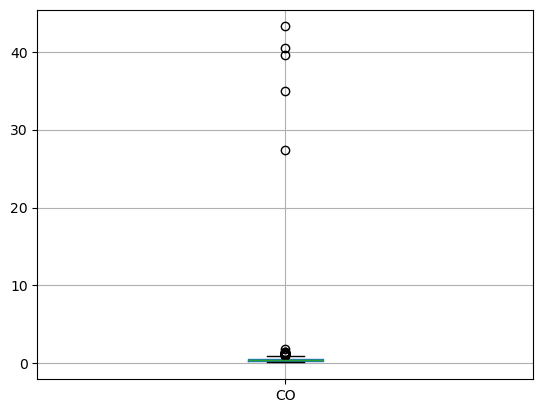

In [18]:
df4.boxplot(column='CO')


<Axes: >

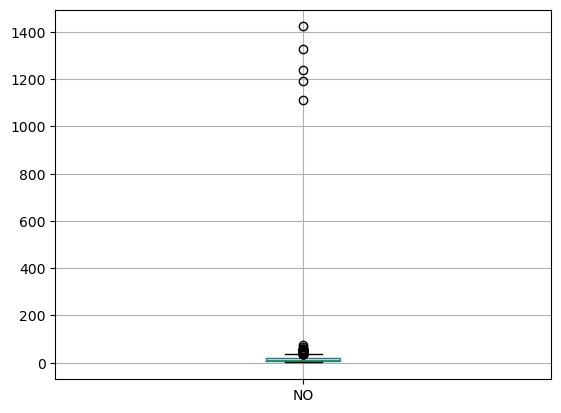

In [19]:
df4.boxplot(column='NO')

<Axes: >

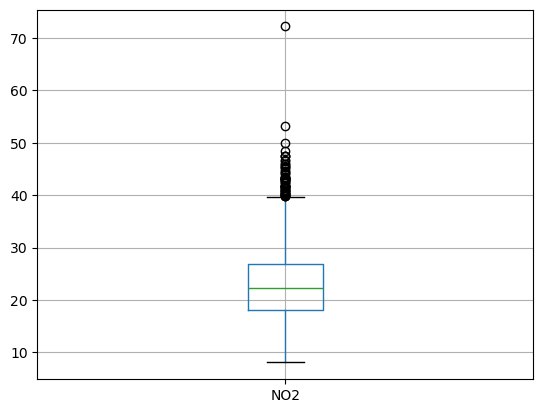

In [20]:
df4.boxplot(column='NO2')

<Axes: >

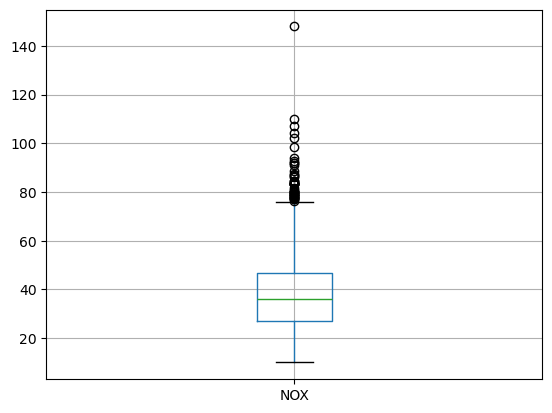

In [21]:
df4.boxplot(column='NOX')

<Axes: >

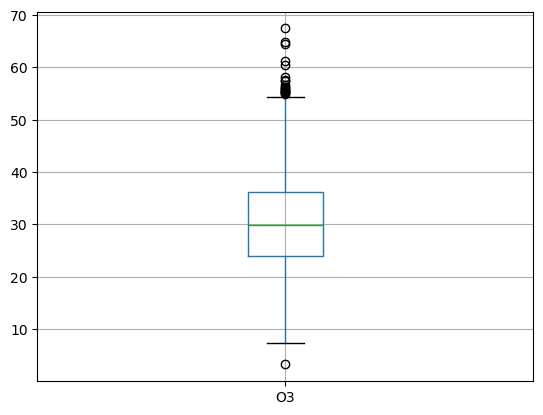

In [22]:
df4.boxplot(column='O3')

<Axes: >

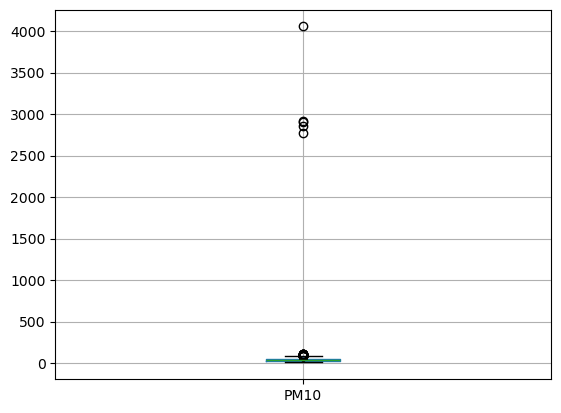

In [23]:
df4.boxplot(column='PM10')

<Axes: >

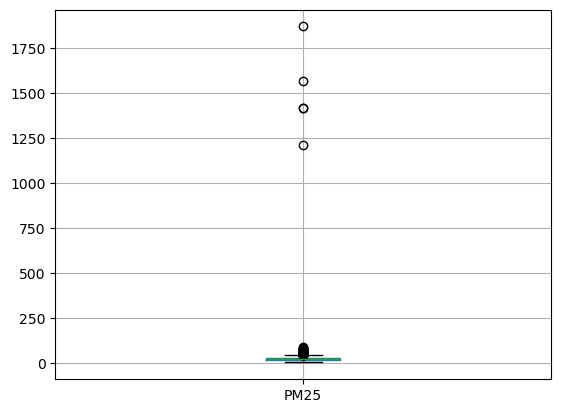

In [24]:
df4.boxplot(column='PM25')

<Axes: >

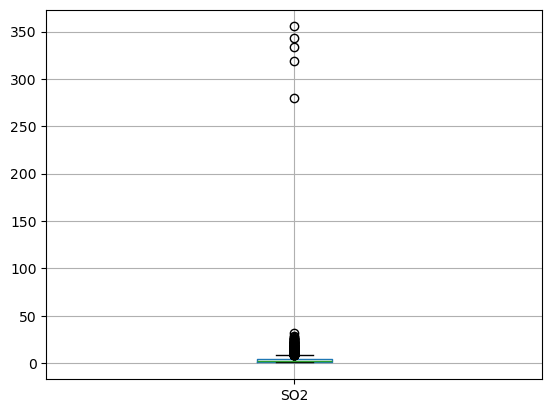

In [25]:
df4.boxplot(column='SO2')

# 3 -. Identificacion y manejo de valores atípicos

In [26]:

df4.loc[df4['CO']>3, 'CO'] = np.nan
df4.loc[df4['NO']>50, 'NO'] = np.nan
df4.loc[df4['NO2']>45, 'NO2'] = np.nan
df4.loc[df4['NOX']>100, 'NOX'] = np.nan
df4.loc[df4['O3']>55, 'O3'] = np.nan
df4.loc[df4['PM10']>150, 'PM10'] = np.nan
df4.loc[df4['PM25']>45, 'PM25'] = np.nan
df4.loc[df4['SO2']>20, 'SO2'] = np.nan



In [27]:
#Verificar la sustitución de valores atípicos a nulos
df4

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,NaN,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789
...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,NaN,21.170139,2.735683
2023-05-28,0.286826,NaN,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588


## imputaciond e valores

Primeras filas del DataFrame filtrado:
                  CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366   36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
2015-01-04  0.726940  24.606272  19.560976        NaN  17.329032   39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   

                 PM25        SO2  
fecha                             
2015-01-01        NaN  11.554723  
2015-01-02  15.449438        NaN  
2015-01-03  12.915129   1.436937  
2015-01-04  16.838284   1.809061  
2015-01-05        NaN   8.315789  


<Figure size 1200x600 with 0 Axes>

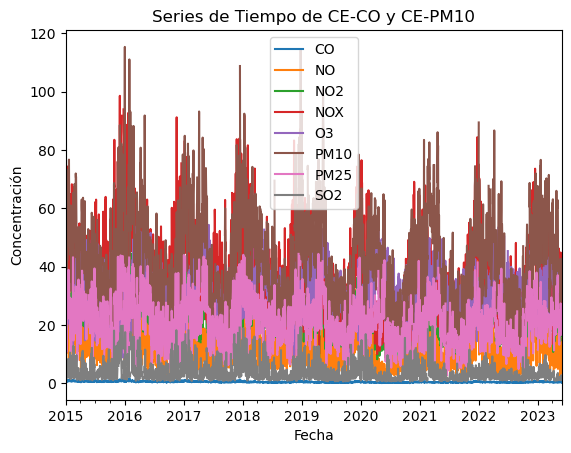


Número de valores nulos antes de la imputación:
CO      162
NO      170
NO2     171
NOX     147
O3      174
PM10    147
PM25    184
SO2     162
dtype: int64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Filtrar el DataFrame para obtener las columnas 'CE-CO' y 'CE-PM10' en el rango de fechas especificado
df4_impute = df4[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2']].loc['2015-01-01':'2023-05-31']

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df4_impute.head())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10'
plt.figure(figsize=(12, 6))
df4_impute.plot()
plt.title('Series de Tiempo de CE-CO y CE-PM10')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df4_impute.isnull().sum())

# Crear una instancia del imputador KNN con 12 vecinos
imputer_knn = KNNImputer(n_neighbors=12)

# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
df4_impute.loc[:, :] = imputer_knn.fit_transform(df4_impute)


Número de valores nulos después de la imputación:
CO      0
NO      0
NO2     0
NOX     0
O3      0
PM10    0
PM25    0
SO2     0
dtype: int64


<Figure size 1200x600 with 0 Axes>

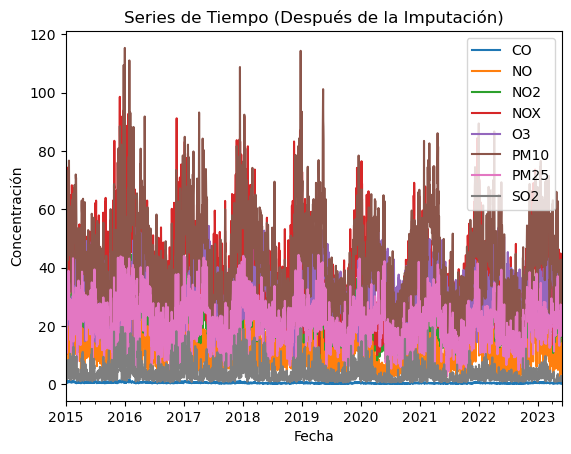

In [29]:
print("\nNúmero de valores nulos después de la imputación:")
print(df4_impute.isnull().sum())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10' después de la imputación
plt.figure(figsize=(12, 6))
df4_impute.plot()
plt.title('Series de Tiempo (Después de la Imputación)')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()


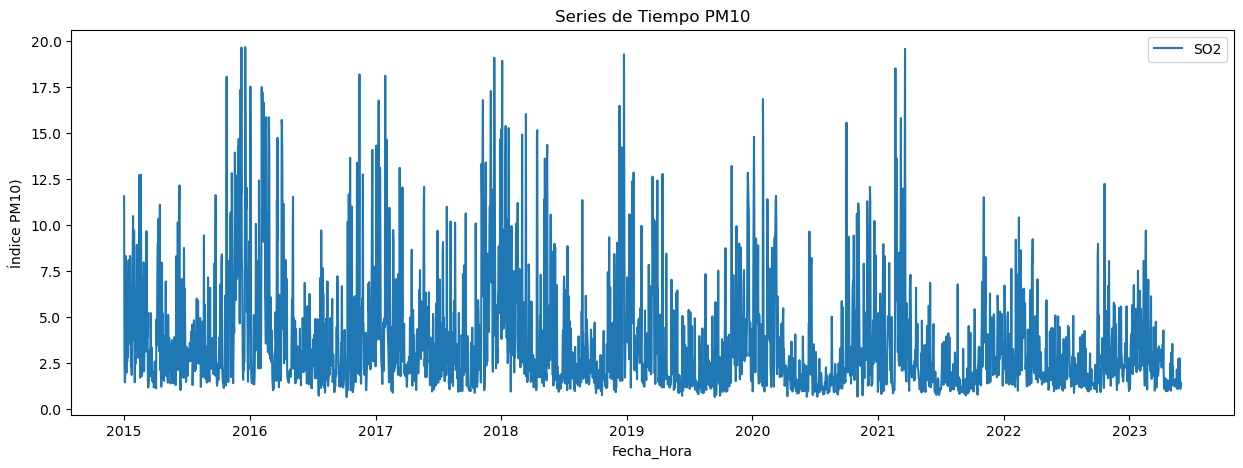

In [35]:
plot_time_series(df4_impute,'SO2', 'Índice PM10)', 'Series de Tiempo PM10', start_date='2015-01-01', end_date='2023-05-31')

In [93]:
from scipy.signal import savgol_filter

In [94]:
df4_impute.to_csv('df4_procesado2.csv',index=False)

# 4-. Análsis descriptivo de series de tiempo

Antes de realizar la imputtación las series de tiempo de las variables las graficas tomaban en cuenta los valores atipicos teniendo picos muy altos, ejemplo la grafica de la variable 'SO2' y después de imputar los valores atípicos la tendencia es mucho màs cercana a los valores reales 

# 5 -.  Modelado y prediccion

# Univariado multispet

In [ ]:
# Estas son las líneas de código utilizado en colab para predecir el modelo 
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 24
future_steps = 12
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CO']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

In [ ]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

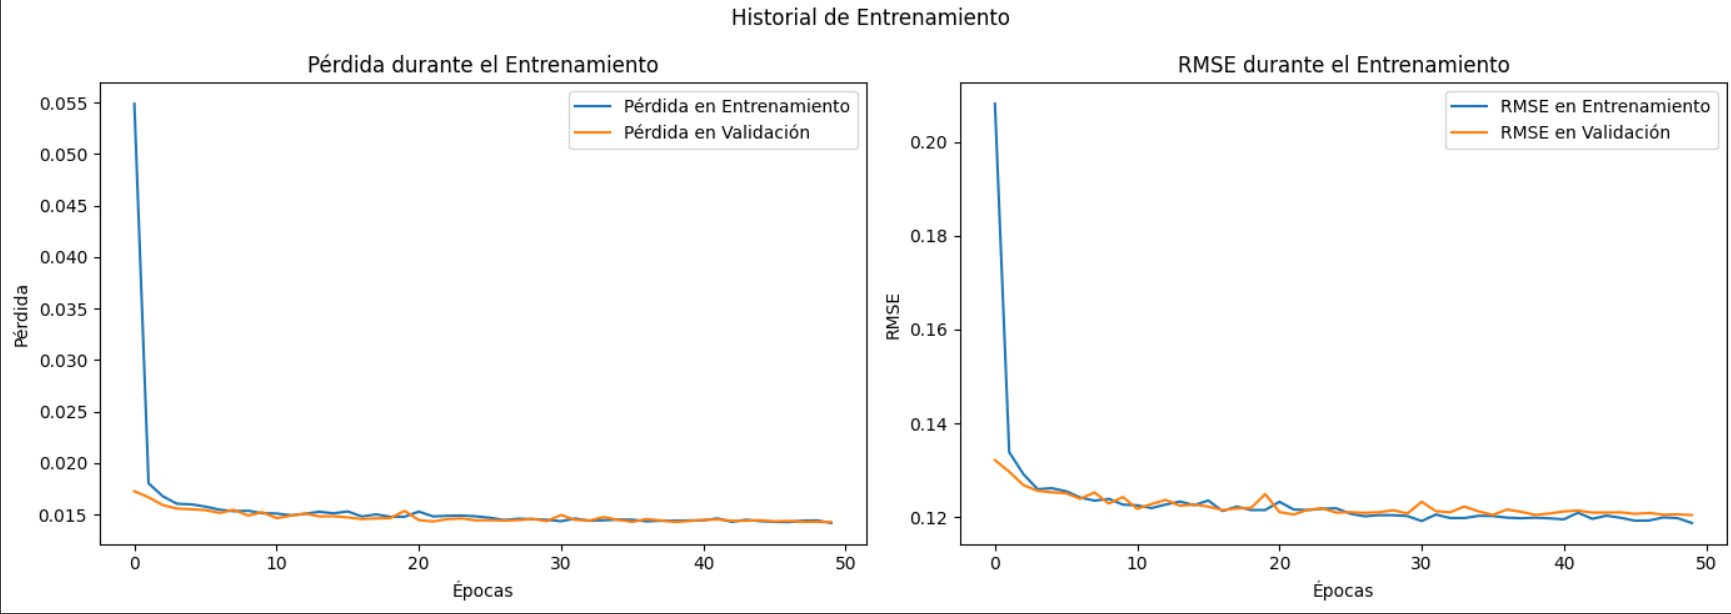

In [ ]:
loss_simple_rnn, rmse_simple_rnn = model_simple_rnn.evaluate(X_eval, y_eval)
print(f"SimpleRNN - Loss en el conjunto de evaluación: {loss_simple_rnn}")
print(f"SimpleRNN - RMSE en el conjunto de evaluación: {rmse_simple_rnn}")

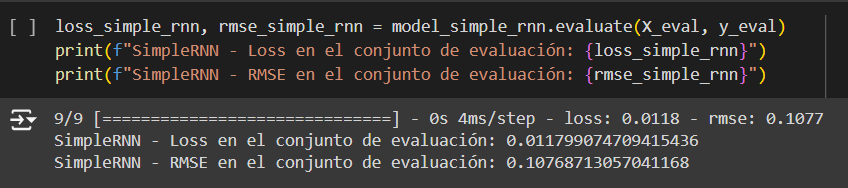

In [ ]:
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

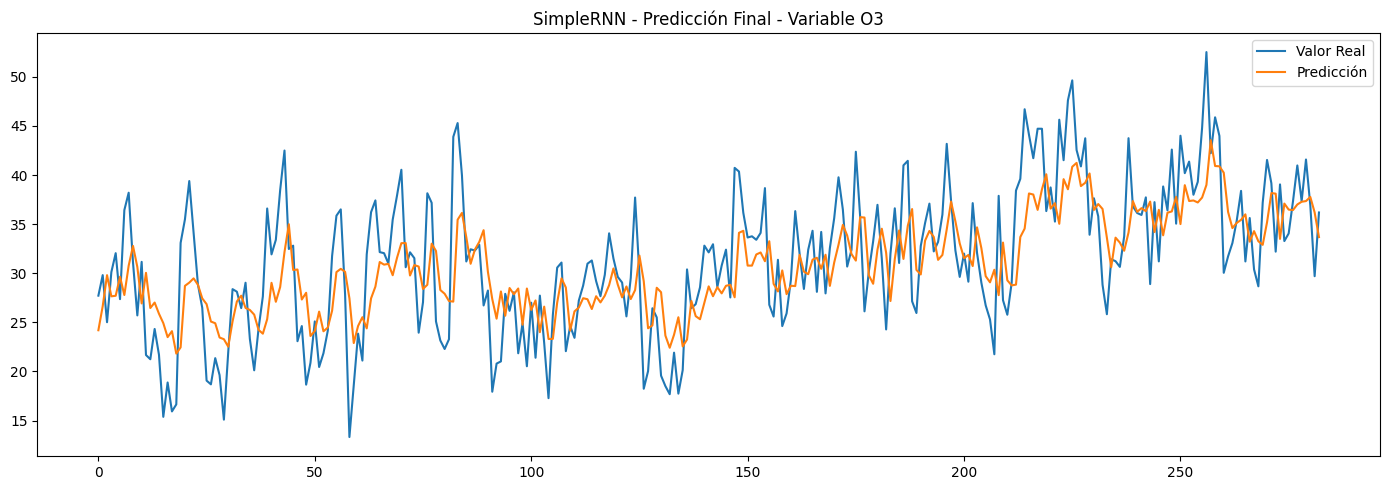

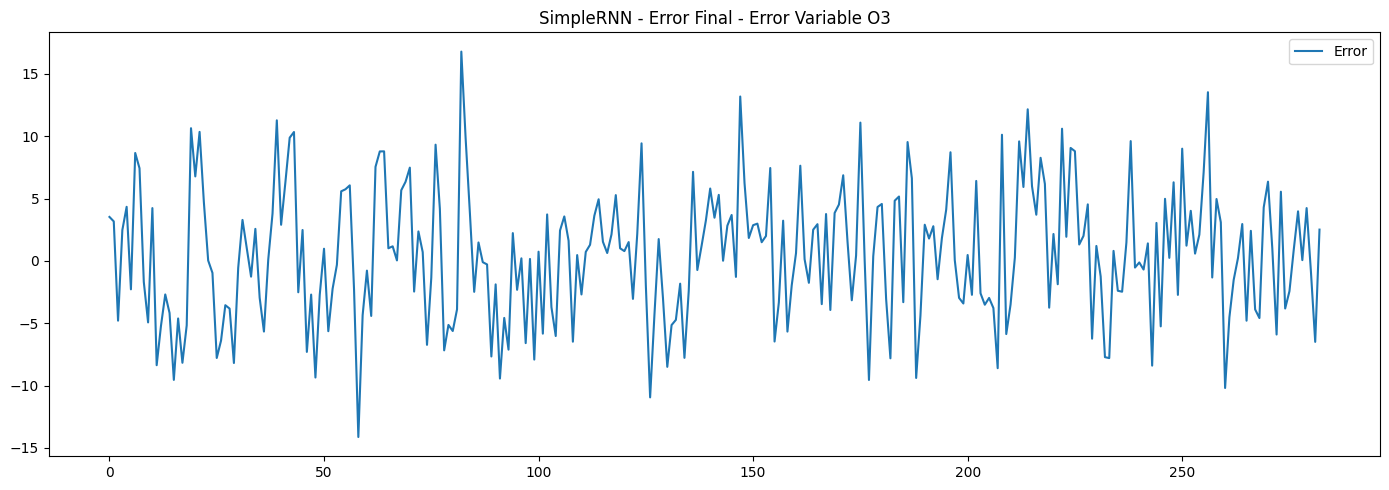

In [ ]:
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.

    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.

    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}

    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])

    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)

    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)

    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)

    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)

    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)

    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.

    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')

    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

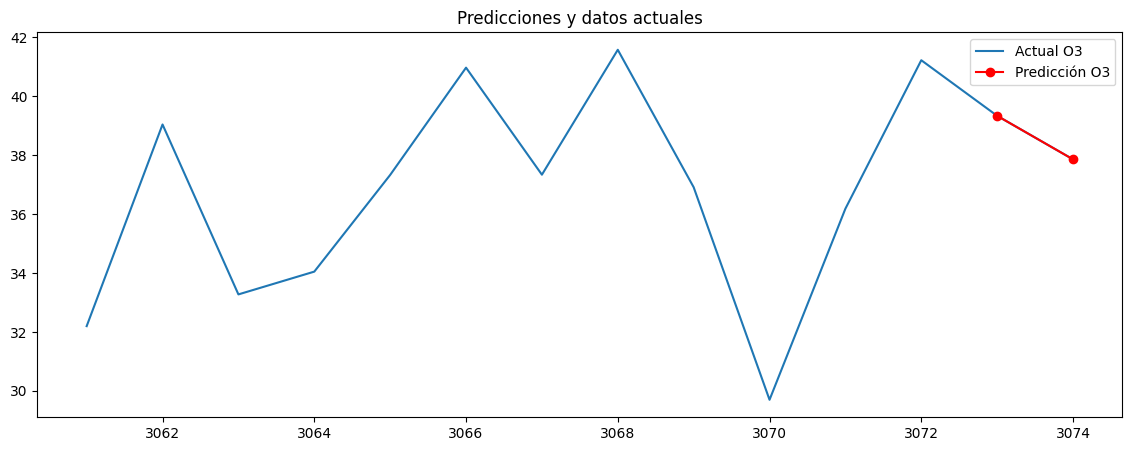

Al utilizar pasos de 24 unidades y querer predecir 12 pasos a futuro, la predicción con lo real varia mucho, sólo predice una tendencia, al reducir las unidades de predicción a 1, la predicción se acerca mucho más al valor real.

# Modelo Multivariado multistep

In [ ]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 24
future_steps = 2
input_columns = ['O3', 'NOX', 'PM10']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CO']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

In [ ]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

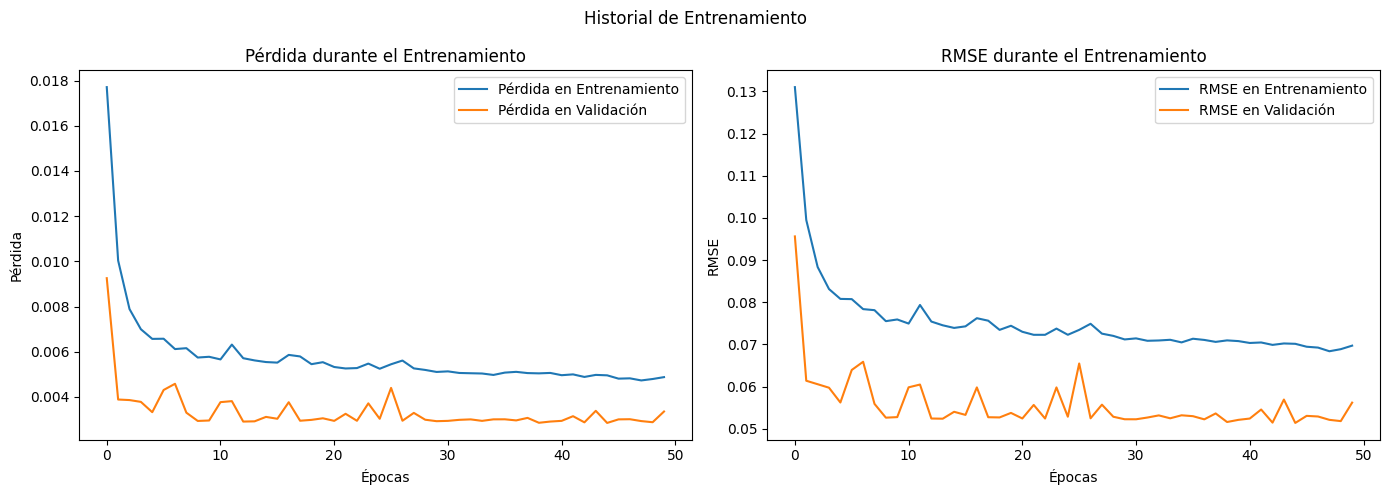

In [ ]:
loss_simple_rnn, rmse_simple_rnn = model_simple_rnn.evaluate(X_eval, y_eval)
print(f"SimpleRNN - Loss en el conjunto de evaluación: {loss_simple_rnn}")
print(f"SimpleRNN - RMSE en el conjunto de evaluación: {rmse_simple_rnn}")

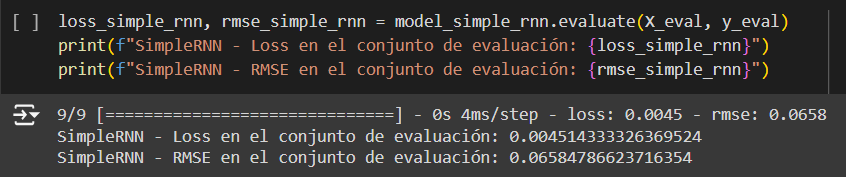

In [ ]:
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

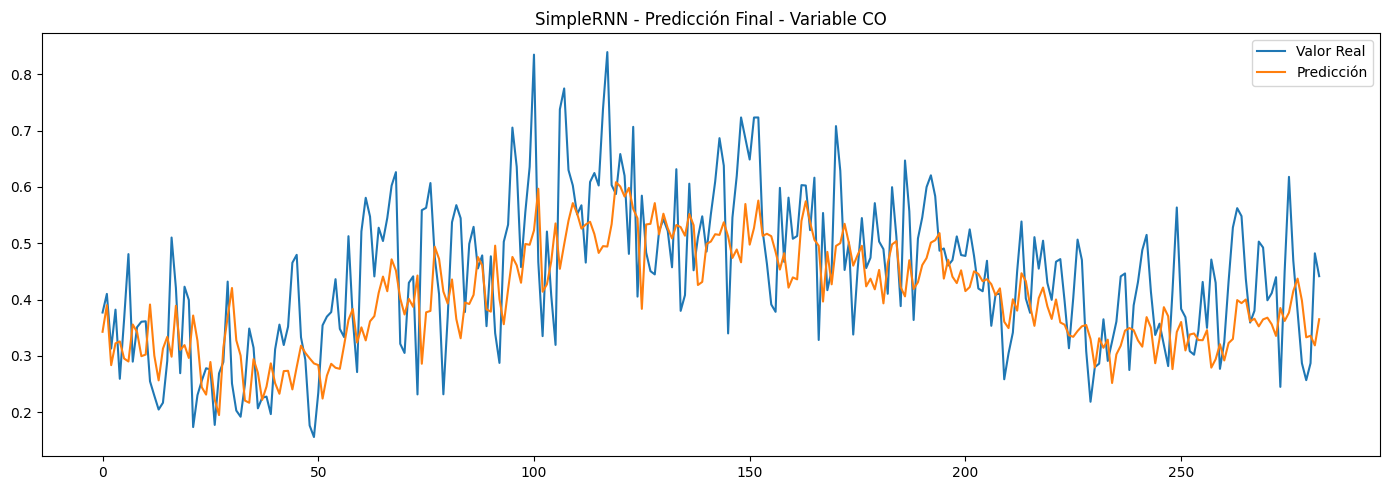

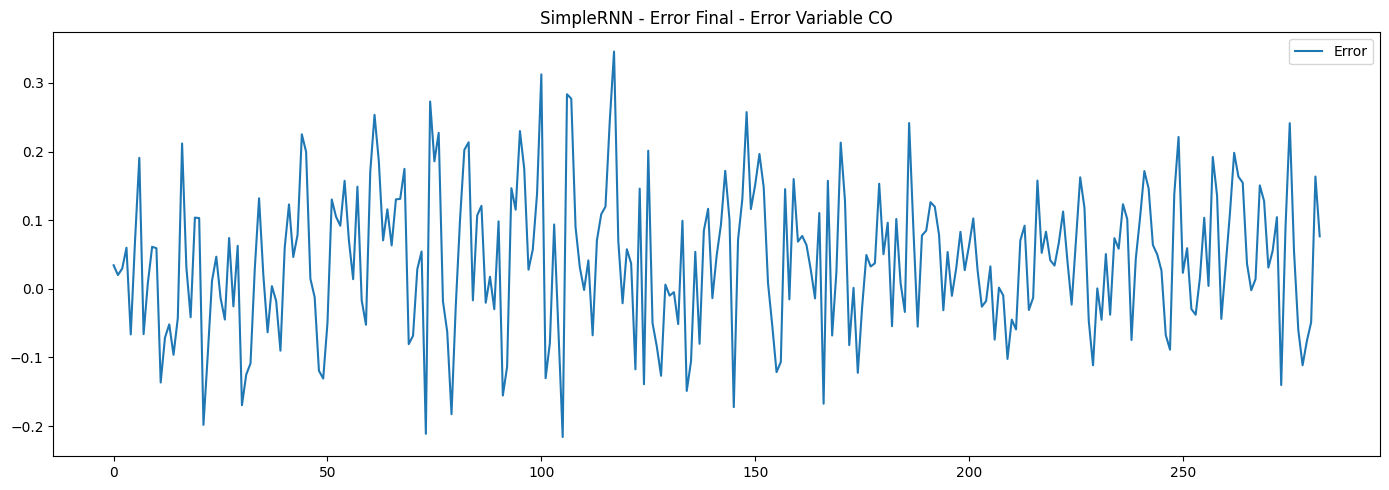

In [ ]:
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.

    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.

    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}

    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])

    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)

    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)

    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)

    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)

    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)

    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.

    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')

    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

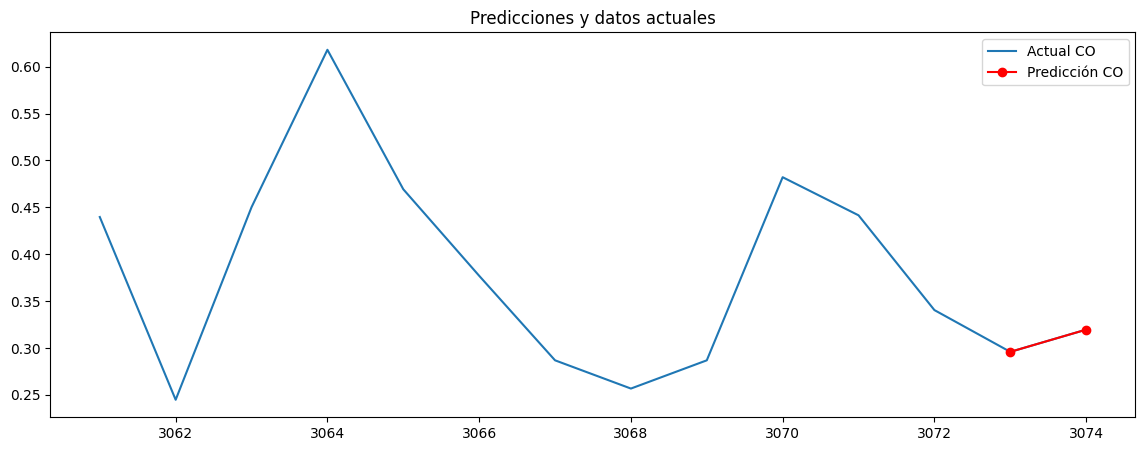

# Al tener los valores de evaluación sobre 24 datos atrás, y querer predecir 12 horas al futuro, el error nos está marcando que la predicción puede ser errónea, sin embargo, al querer predecir una unidad a futuro, el error es más cercano a cero y la predicción es más acertada.